In [6]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [7]:
# -----------------------------------------
# building bernstain vazinari algorithm   -
# -----------------------------------------

secret_number is '101001'

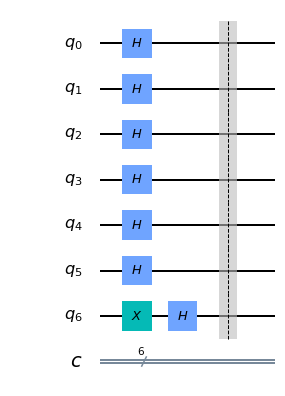

In [11]:
circuit = QuantumCircuit(6+1,6)
# apply h gate to first six qubits out of all 7 qubits we have
# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secret_number)))

# for the last qubit apply x gate and then h gate
# circuit.x(6)
# circuit.h(6)
circuit.x(len(secret_number))
circuit.h(len(secret_number))

circuit.barrier()
circuit.draw(output='mpl')

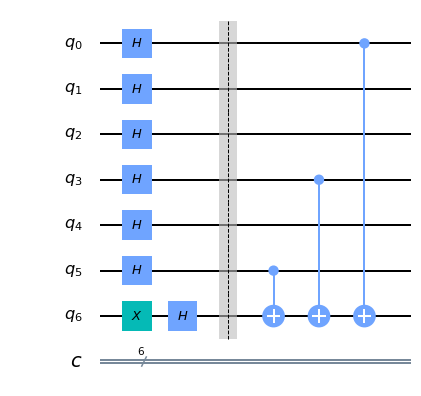

In [12]:
# build the box that contains secret number
# for every 1 in secret number I am goint to put cx gate.
# for first 1 it will be '5', for second 1 it will be '3' for last one , '0'
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)
# thats the box that encodes the secret number
circuit.draw(output='mpl')

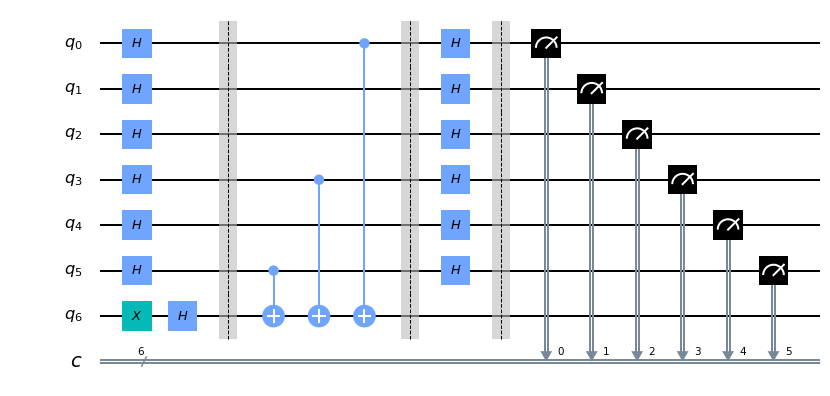

In [13]:
# apply h gates again
circuit.barrier()
circuit.h([0,1,2,3,4,5])

# add measurement
circuit.barrier()
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.draw(output='mpl')

In [14]:
# execute
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)
# if there is '1' the result was '101001'

{'101001': 1}
